# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. The objective is to train 2 types of unsupervised learning models, and combined with meaningful insights on the data, to assist in making better business decisions.

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('Wholesale_Data.csv')
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
#checking for null values
df.isnull().sum()
#We see that there are no null values

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
#checking for duplicates
df.duplicated().sum()
#we see that there are no duplicated rows

0

In [6]:
#checking for any values that are 0 or "missing"
(df == 0).astype(int).sum()
#we see that there are no missing values. From the checks, we can see that the dataset is already clean

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [7]:
#checking stats to gain some initial insight
df.describe()
#we can see that the ranges of values for all colunms except for Channel and Region are relatively the same, but some are still 
#noticibily different, so we will have to take this into account in feature engineering

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

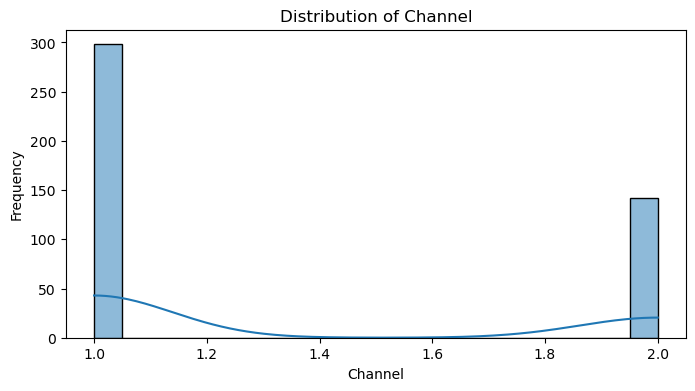

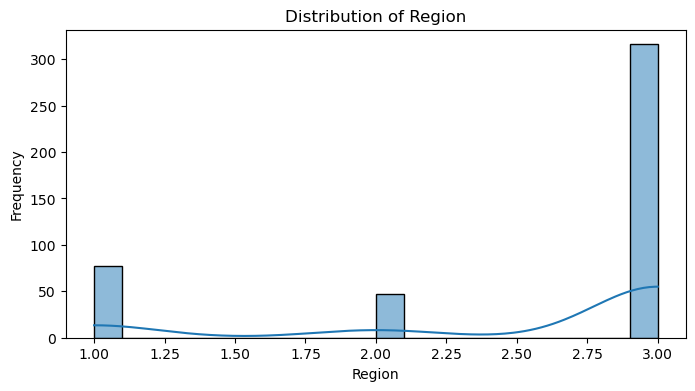

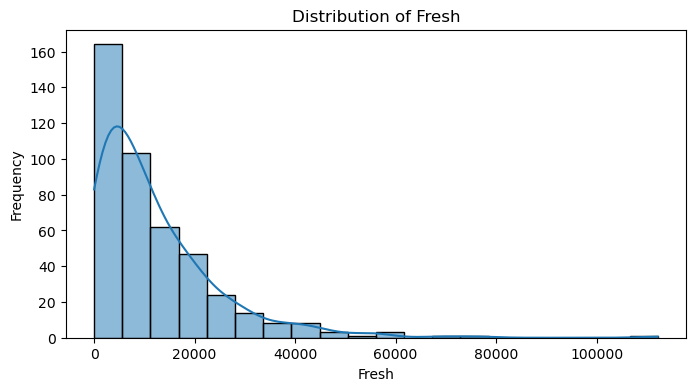

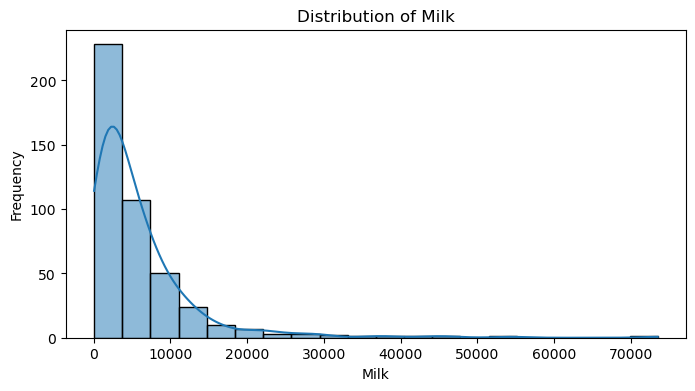

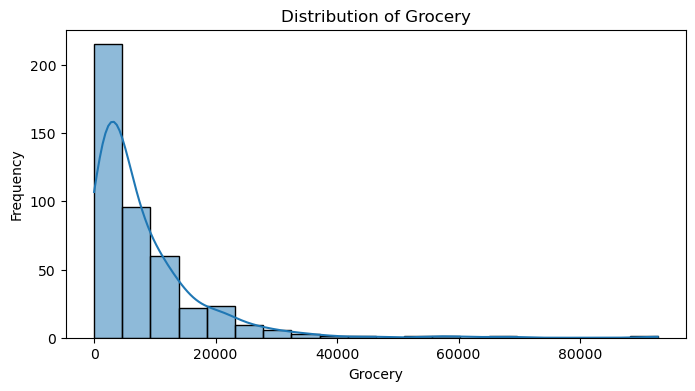

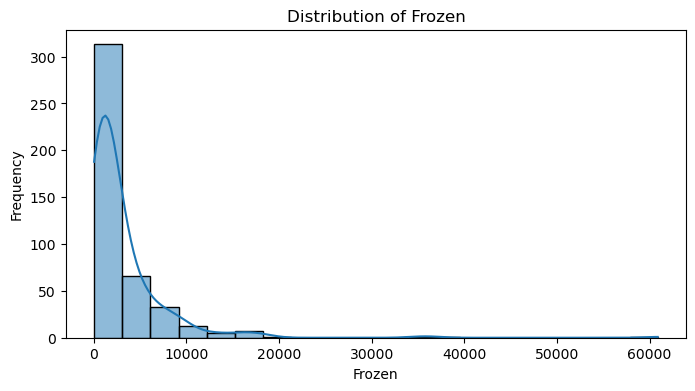

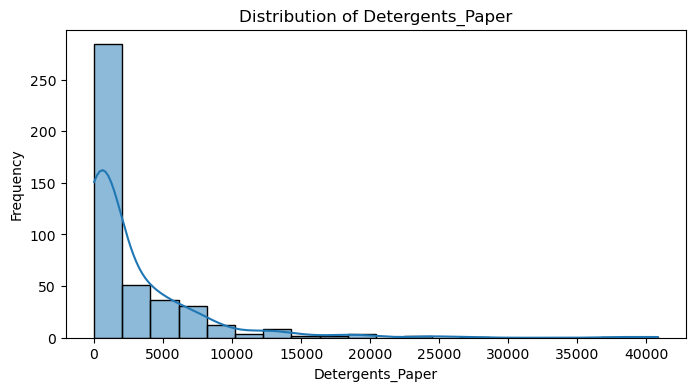

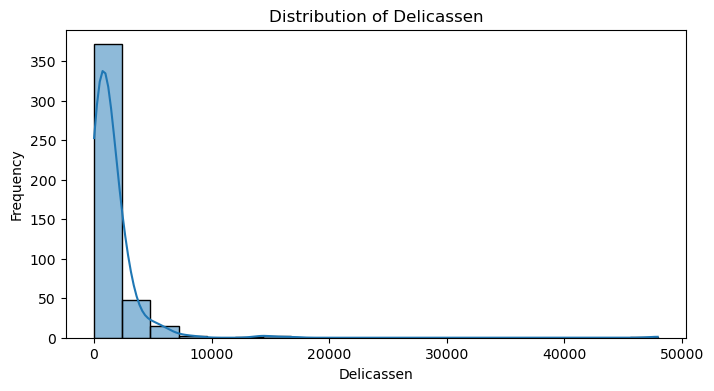

In [9]:
# Distribution Plots to look at the distribution of our predictor values

# Histograms for numerical variables
num_vars = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
for var in num_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

We can see from the distribution histograms that there are 2 channels of revenue, with most of it coming from channel 1. We see that there are 3 regions of sales, with most of it coming from region 3. And we can also see that the distrubitions of product categories are all relatively good exponential distrubitions, which shows that most clients of the wholesaler spend around the same relatively low amount on each product, and a lot less clients spend a relatively high amount on each product, which makes sense and is to be expected.

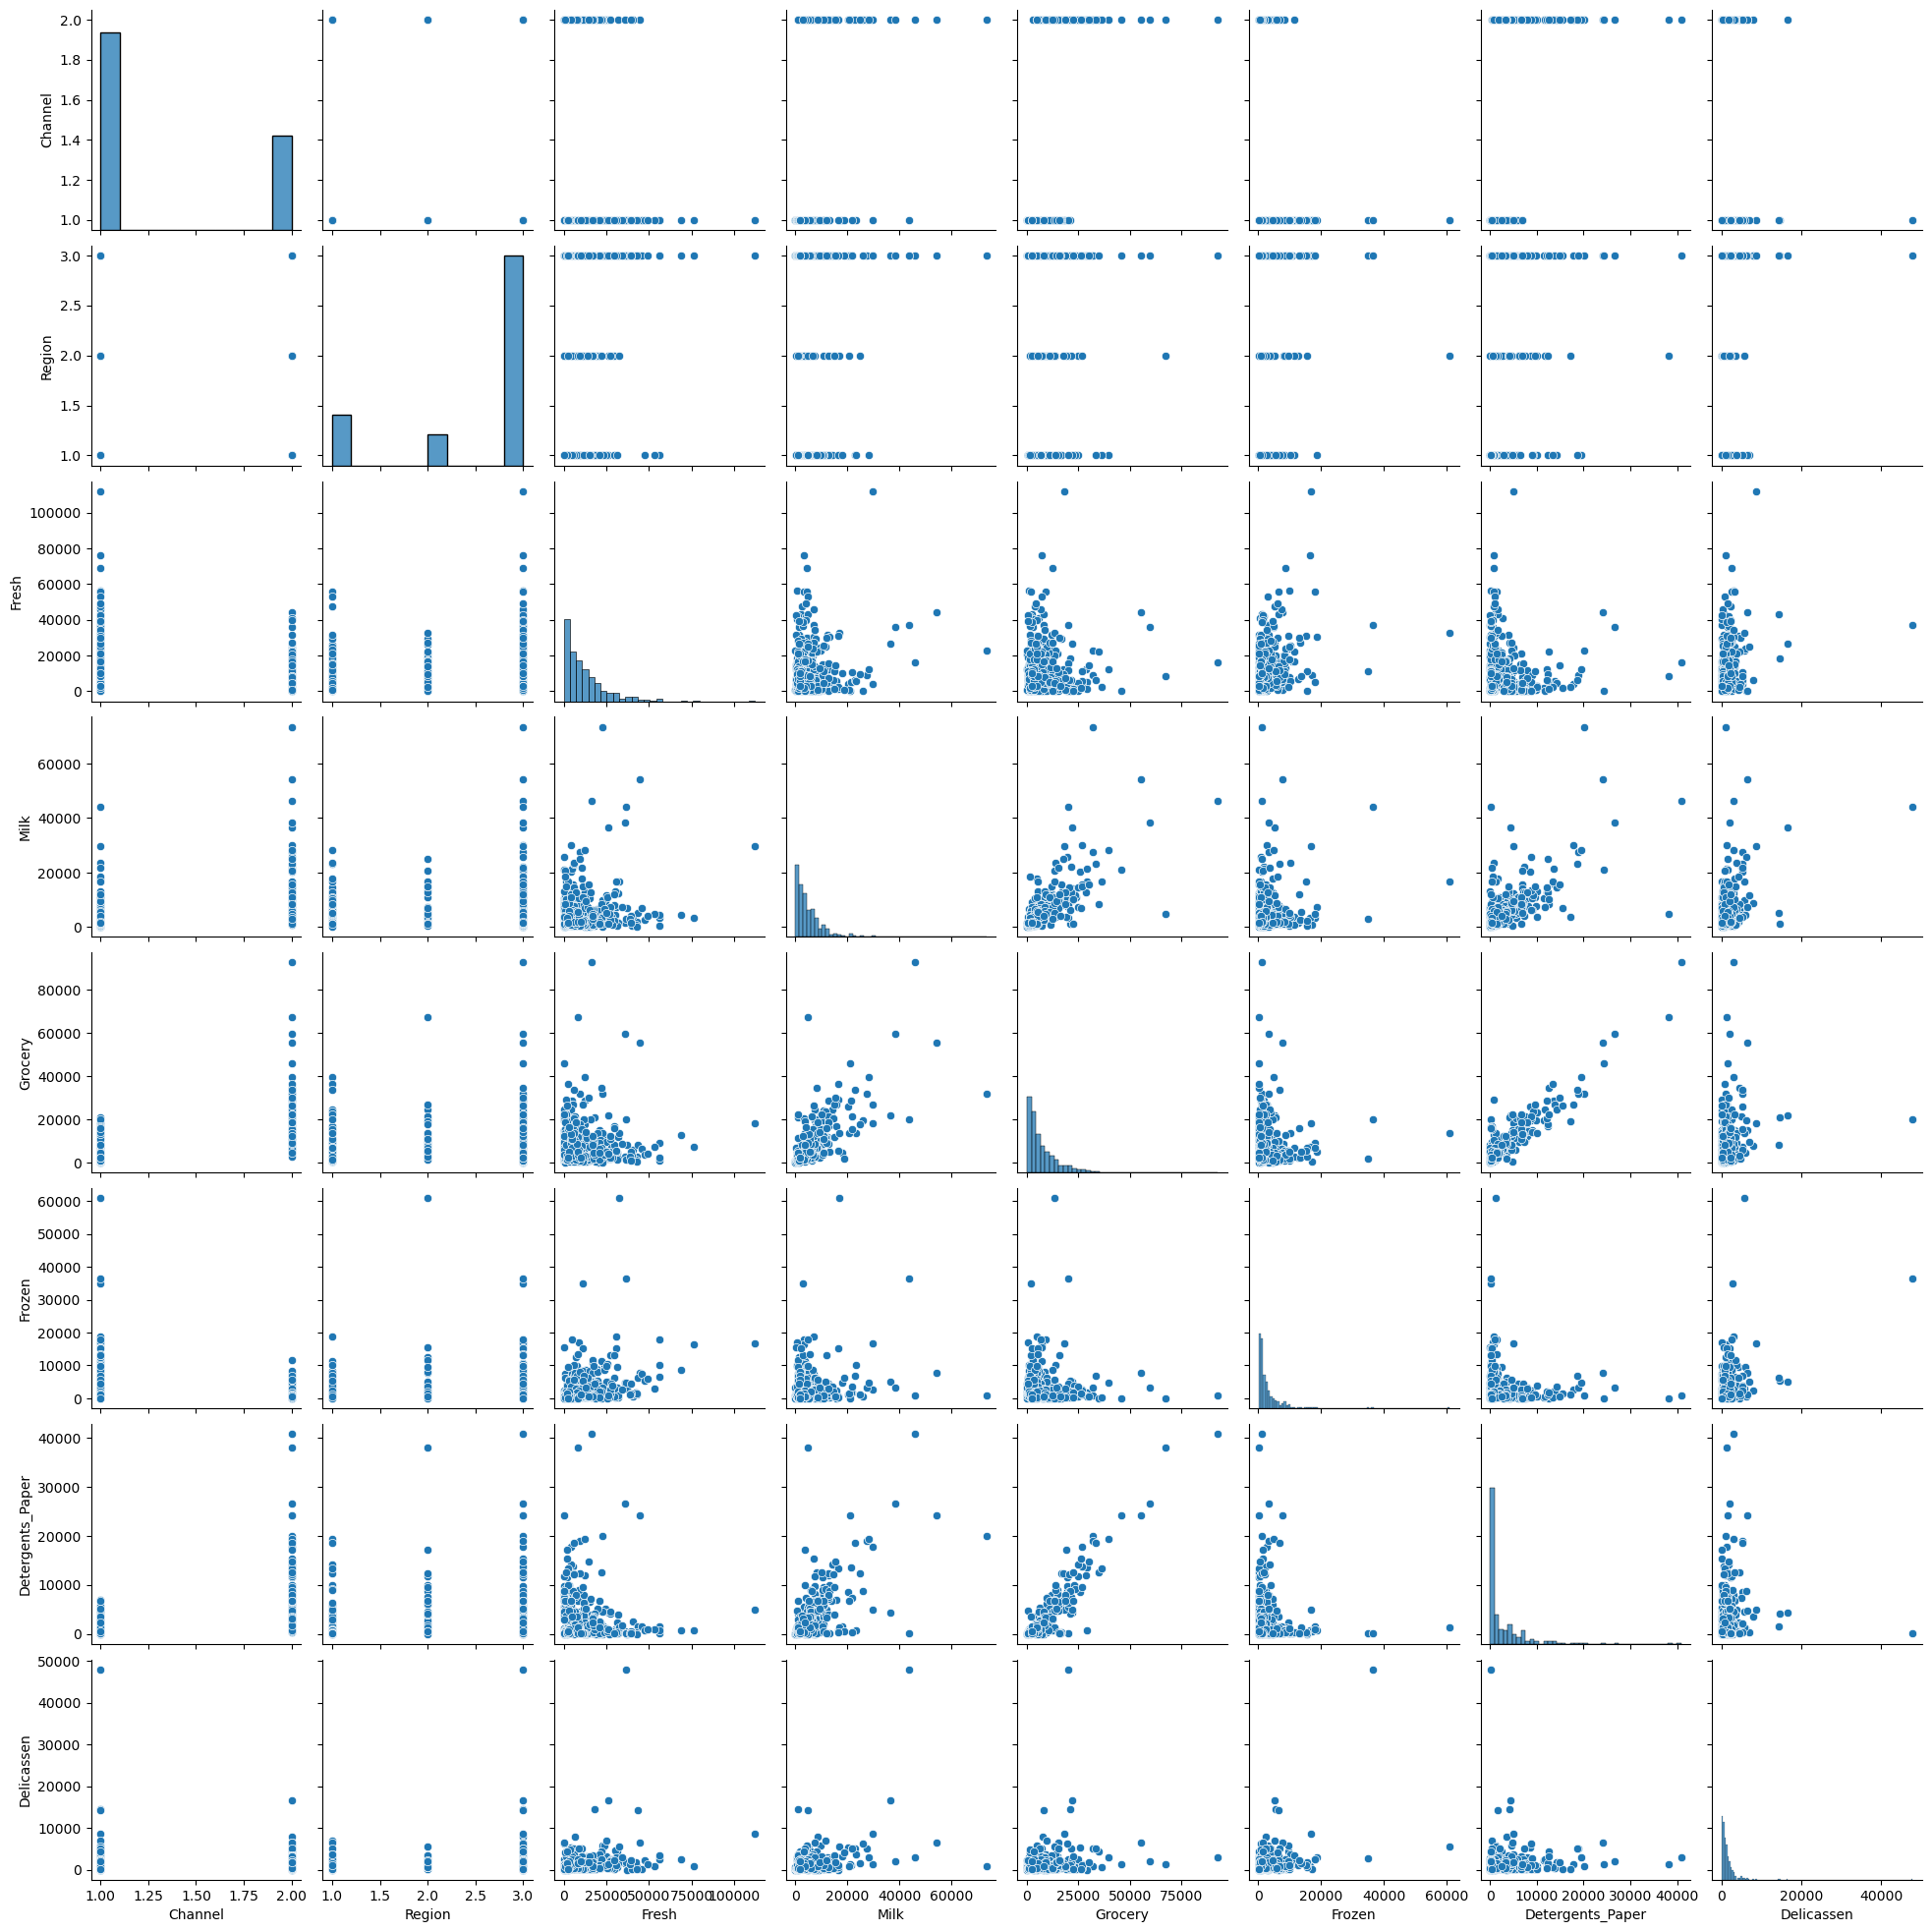

In [10]:
#Pairplot to show how the predictor variables are related to each other to gain some initial insight on the relationships
sns.pairplot(df)

From the above scatter plots, we can see that there are a few notible relationships between the variables. One being a very good linear relationship between the purchasing of groceries and detergent_paper, and also a strong linear relationship between the purchasing of groceries and milk, where as we can see from the plots that there is no discernable relationship between the purchasing of delicassens and all the other product categories.

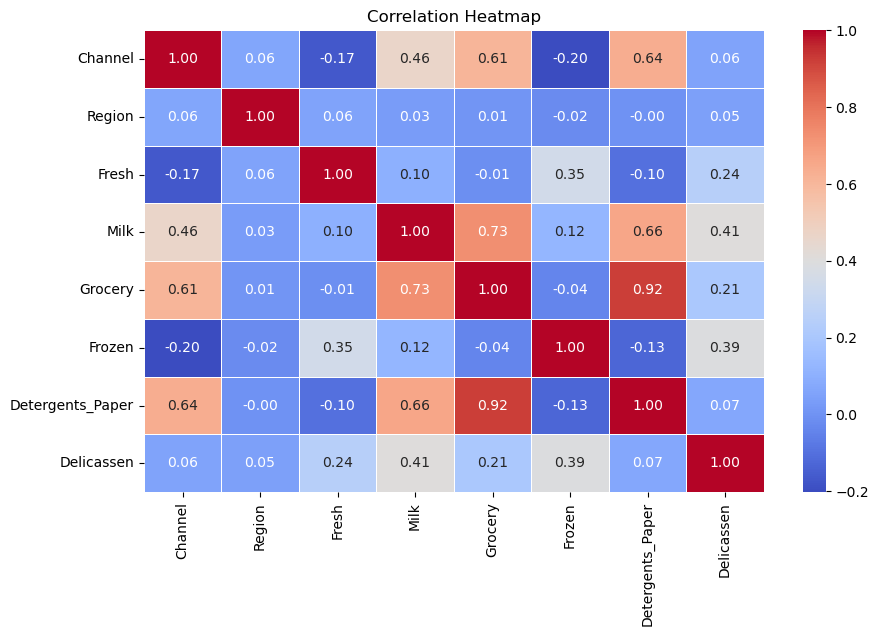

In [11]:
#Correlation analysis
#Correlation heatmap for products to calculate and visualize some initial correlations between the products
corr_matrix = df[num_vars].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

From the correlation calculations, we can see that there are quite a few notable correlations between the features. These include a very strong correlation for Detergents_Paper and Grocery, Grocery and Milk, Detergents_Paper and Milk. There are also a strong correlation between Detergents_Paper and Channel, and Grocery and Channel, which would be good insight for the wholesaler to have and can help in making better business decisions for those product categories and the channel that they going through.  

In [12]:
#checking for outliers in each feature based on z-scores
from scipy import stats

In [13]:
z = np.abs(stats.zscore(df) > 3)
z

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [14]:
#checking for the amount of outliers for each feature
(z == True).astype(bool).sum()
#we can see that there are a total of 43 outlier values

Channel              0
Region               0
Fresh                7
Milk                 9
Grocery              7
Frozen               6
Detergents_Paper    10
Delicassen           4
dtype: int64

Since the dataset is relatively very small, and since the outlier values are still real data from clients, the outliers were decided to be kept in the dataset, since even though they are mathematically outliers, they are still real data that we would want to capture in our models.

In [15]:
#splitting dataset into training and testing before data scaling
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test = train_test_split(df, test_size = 0.2, random_state = 42)


In [36]:
X_train

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
266,2,1,572,9763,22182,2221,4882,2563
294,1,2,21273,2013,6550,909,811,1854
31,1,3,2612,4339,3133,2088,820,985
84,2,3,11867,3327,4814,1178,3837,120
301,2,2,5283,13316,20399,1809,8752,172
...,...,...,...,...,...,...,...,...
106,2,3,1454,6337,10704,133,6830,1831
270,1,1,4720,1032,975,5500,197,56
348,1,3,3428,2380,2028,1341,1184,665
435,1,3,29703,12051,16027,13135,182,2204


In [37]:
X_test

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
265,1,1,5909,23527,13699,10155,830,3636
78,1,3,10766,1175,2067,2096,301,167
347,2,3,27380,7184,12311,2809,4621,1022
255,1,1,31614,489,1495,3242,111,615
327,1,2,542,899,1664,414,88,522
...,...,...,...,...,...,...,...,...
57,2,3,5417,9933,10487,38,7572,1282
137,1,3,3087,8080,8282,661,721,36
24,2,3,22647,9776,13792,2915,4482,5778
17,1,3,5876,6157,2933,839,370,4478


In [19]:
#data transformation (scaling)
#we will apply some data scaling to the features, since the ranges of values relatively different
from sklearn.preprocessing import StandardScaler

In [20]:
#since Unsupervised Learning models don't require a train and a test dataset, we will scale the total data
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

In [ ]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [23]:
from sklearn.cluster import KMeans

In [38]:
#determining best number of clusters using the elbow rule
def plot_distortion(X_train_scaled,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X_train_scaled)
        distortions.append(km.inertia_)
        
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

using the elbow rule to evaluate the Kmeans model

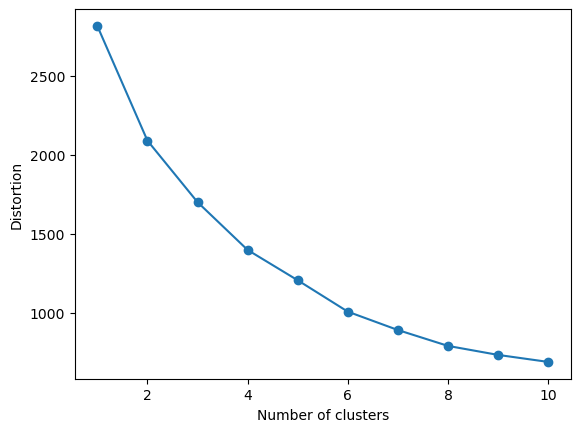

In [81]:
#plotting for the elbow rule
plot_distortion(X_train_scaled,max_clusters=10)
#We can see that there is no clear elbow, but at 6 clusters, the distortion starts to decrease slower than before 6 clusters,
#so we will consider 4 to be the best elbow candidate and use the optimal 6 clusters

In [82]:
#model building
km = KMeans(n_clusters=6, 
            n_init=10,
            init ='k-means++',
            random_state=0)

In [83]:
km_results = km.fit_predict(X_test_scaled)
km_results
#The results show which cluster each row of data (or client) has been placed into

array([3, 5, 1, 0, 0, 5, 5, 1, 5, 5, 0, 5, 1, 5, 5, 5, 5, 1, 1, 5, 1, 2,
       5, 5, 5, 5, 3, 0, 3, 5, 1, 1, 5, 2, 5, 5, 0, 1, 2, 0, 1, 5, 0, 5,
       1, 2, 4, 1, 1, 3, 5, 5, 5, 5, 1, 5, 1, 5, 1, 1, 5, 3, 2, 1, 2, 5,
       1, 5, 5, 5, 1, 5, 5, 3, 5, 2, 2, 2, 1, 5, 0, 5, 3, 1, 5, 1, 5, 5],
      dtype=int32)

In [84]:
#doing a predict on the whole data, so that we can join them the to see the cluster outputs for each client, 
#to gain insights on the clusters
km_full_results = km.fit_predict(df)
km_full_results

array([3, 3, 3, 0, 4, 0, 0, 3, 0, 3, 3, 0, 4, 4, 4, 0, 3, 0, 4, 3, 4, 0,
       4, 5, 4, 4, 0, 0, 5, 1, 4, 0, 4, 4, 0, 3, 4, 3, 5, 1, 4, 4, 3, 5,
       3, 5, 5, 2, 3, 5, 0, 0, 1, 3, 4, 0, 5, 3, 0, 3, 0, 2, 0, 3, 0, 5,
       3, 4, 0, 0, 4, 4, 0, 4, 3, 4, 0, 5, 0, 0, 0, 3, 3, 4, 0, 2, 2, 1,
       0, 4, 0, 0, 5, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 1, 0, 4, 3, 3, 3, 5,
       0, 3, 4, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 3, 4, 1, 4, 4, 0, 1, 0, 0,
       4, 0, 0, 0, 3, 3, 0, 0, 4, 4, 1, 0, 4, 5, 0, 0, 0, 4, 4, 0, 4, 0,
       0, 5, 3, 4, 3, 3, 3, 0, 4, 5, 3, 5, 3, 0, 0, 0, 3, 5, 3, 3, 0, 3,
       1, 0, 0, 0, 3, 1, 3, 1, 0, 0, 0, 3, 3, 3, 4, 0, 0, 3, 0, 4, 4, 3,
       0, 0, 5, 5, 4, 0, 0, 5, 0, 3, 0, 5, 4, 5, 0, 3, 3, 3, 5, 4, 3, 0,
       0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 4, 0, 4, 0, 0, 4, 0, 1, 4, 4,
       4, 0, 3, 3, 0, 0, 4, 0, 0, 5, 0, 4, 3, 4, 0, 0, 1, 1, 0, 0, 4, 0,
       3, 5, 5, 4, 3, 4, 0, 0, 3, 1, 0, 0, 4, 0, 0, 4, 0, 0, 1, 4, 1, 1,
       0, 4, 4, 1, 0, 0, 0, 3, 4, 0, 4, 0, 3, 0, 4,

In [85]:
df['cluster'] = km_full_results

In [86]:
#we can see that the cluster with the most amount of clients in it is cluster 0, we will look at some stats of 
#cluster 0 for some busines insights
df['cluster'].value_counts()

cluster
0    183
4    101
3     90
5     38
1     23
2      5
Name: count, dtype: int64

In [87]:
df_highest = df.where(df['cluster'] == 0)
df_highest = df_highest.dropna()
df_highest

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,0.0
5,2.0,3.0,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,0.0
6,2.0,3.0,12126.0,3199.0,6975.0,480.0,3140.0,545.0,0.0
8,1.0,3.0,5963.0,3648.0,6192.0,425.0,1716.0,750.0,0.0
11,2.0,3.0,13146.0,1124.0,4523.0,1420.0,549.0,497.0,0.0
...,...,...,...,...,...,...,...,...,...
429,1.0,3.0,8607.0,1750.0,3580.0,47.0,84.0,2501.0,0.0
431,1.0,3.0,8533.0,5506.0,5160.0,13486.0,1377.0,1498.0,0.0
433,1.0,3.0,1982.0,3218.0,1493.0,1541.0,356.0,1449.0,0.0
438,1.0,3.0,10290.0,1981.0,2232.0,1038.0,168.0,2125.0,0.0


In [88]:
df_highest.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.0
mean,1.065574,2.519126,6581.852459,2383.967213,2905.092896,2895.732240,662.071038,897.677596,0.0
std,0.248215,0.790337,4069.883148,1844.608848,1824.533352,4006.682635,871.782978,872.077833,0.0
min,1.000000,1.000000,3.000000,55.000000,137.000000,47.000000,3.000000,3.000000,0.0
25%,1.000000,2.000000,2967.500000,1012.000000,1548.000000,776.500000,168.500000,324.500000,0.0
50%,1.000000,3.000000,6633.000000,1897.000000,2405.000000,1492.000000,311.000000,659.000000,0.0
75%,1.000000,3.000000,9664.000000,3274.000000,4099.500000,3512.500000,804.000000,1123.500000,0.0
max,2.000000,3.000000,14755.000000,9250.000000,7854.000000,35009.000000,4762.000000,5137.000000,0.0


Looking at cluster 0, we can see that products of the "Fresh" category had by far the highest average annual spending for clients in this cluster, and products of the categories"Detergents_Paper" and "Delicassen" had by far the lowest average annual spending. This shows us that clients in cluster 0 are spending more money annually on Fresh products than any other category of products, and spending the least on Detergents_Paper and Delicassen products. Since cluster 0 has the highest amount of clients, we can use this to make better business decisions by focusing and investing more on the products of the Fresh category. 

using silhouette score for evaluation of the model

/Users/richardli/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


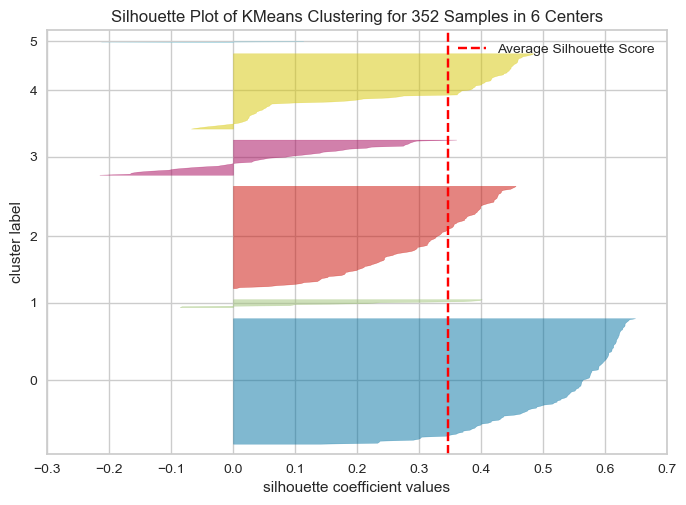

0.3462812393958633


In [92]:

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer 
k=6
# Instantiate the clustering model and visualizer
km =  KMeans(k, random_state=1)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X_train_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
print(visualizer.silhouette_score_)

we can see from the silhouette plot and the silhouette score that the average score is ~0.346, and we can see that
there are no overlapping clusters, and the silhouette score of cluster 0 is the highest at ~0.65, which is a very good score
and and average score of ~0.346 is also decent, since its above 0 and much closer to 1 than -1, meaning that the data points
in the clusters are relatively compact.

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [93]:
#We will use Agglomerative clustering.
#It performs a hierarchical clustering using a bottom-up approach: each observation starts in its own cluster, 
#and the clusters are successively merged together.

# aglomerative clustering
from sklearn.cluster import AgglomerativeClustering

# cluster hierarchy
import scipy.cluster.hierarchy as sch

In [94]:
#Using a dendogram to indentify the right number of clusters
def plot_dendrogram(X_train_scaled,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X_train_scaled, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

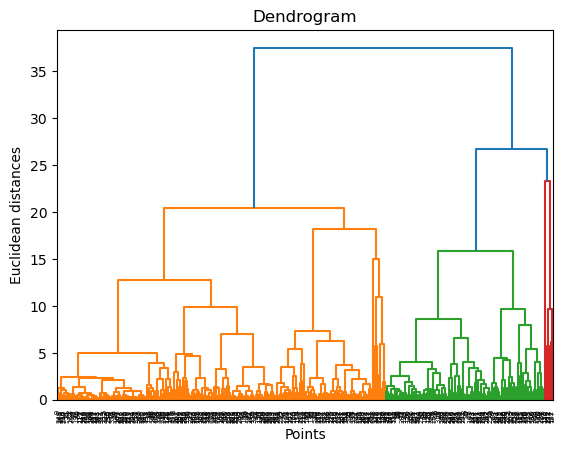

In [74]:
plot_dendrogram(X_train_scaled)

From the dendogram, we can see that the optimal amount of clusters for the hierarchical model is also 4, which is less than the 
Kmeans model, meaning that the clients will be split up more generally than the Kmeans model, which split then up into 6 clusters,
making each data in the clusters more compact and more specific for the Kmeans model. From a business perspective, having 6 clusters
would mean that the clients are more specifically grouped, and the business can therefore talor their investment/marketing strategies
more closely to each of the client groups, whereas only 4 clusters means the clients are grouped more generally, and the business 
can therefore make more generalized investment/marketing strategies.

In [95]:
#model building
ac = AgglomerativeClustering(metric='euclidean',
                             linkage='ward',
                             n_clusters = 4)

In [96]:
ac.fit_predict(X_train_scaled)
#The results show which cluster each row of data (or client) has been placed into based on Agglomerative Clustering

array([2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2,
       0, 0, 3, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0,

In [97]:
#doing a predict on the whole data, so that we can join them the to see the cluster outputs for each client, 
#to gain insights on the clusters
ac_full_results = ac.fit_predict(df)
ac_full_results

array([2, 2, 2, 2, 3, 2, 2, 2, 2, 0, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 3, 2, 3, 0, 1, 3, 2, 3, 3, 2, 2, 3, 2, 0, 1, 3, 3, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 3, 2, 0, 2, 3, 2, 2, 0, 2, 2, 2, 0,
       2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 0, 2, 2, 2, 2, 2, 3, 2, 0, 0, 1,
       2, 3, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 2, 2, 2, 0,
       2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 1, 1, 3, 3, 2, 1, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 0, 2, 2, 2, 3, 3, 2, 3, 2,
       2, 0, 2, 3, 2, 2, 2, 3, 3, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       1, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2, 0, 2, 3, 3, 2,
       2, 2, 0, 0, 3, 2, 2, 0, 2, 2, 2, 0, 3, 0, 2, 2, 2, 2, 0, 3, 2, 2,
       3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 1, 3, 3,
       3, 2, 2, 2, 2, 3, 3, 2, 2, 0, 2, 3, 2, 3, 2, 2, 1, 1, 2, 2, 3, 2,
       2, 2, 0, 3, 2, 3, 2, 2, 2, 1, 2, 2, 3, 2, 2, 3, 2, 2, 1, 3, 1, 1,
       2, 3, 3, 1, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3,

In [98]:
df['cluster'] = ac_full_results

In [100]:
#we can see that the cluster with the most amount of clients in it is cluster 2 (by a large margin as well), we will look at some 
#tats of cluster 2 for some busines insights
df['cluster'].value_counts()

cluster
2    261
3    111
0     45
1     23
Name: count, dtype: int64

In [101]:
df_highest = df.where(df['cluster'] == 2)
df_highest = df_highest.dropna()
df_highest

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2.0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0,2.0
1,2.0,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,2.0
2,2.0,3.0,6353.0,8808.0,7684.0,2405.0,3516.0,7844.0,2.0
3,1.0,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,2.0
5,2.0,3.0,9413.0,8259.0,5126.0,666.0,1795.0,1451.0,2.0
...,...,...,...,...,...,...,...,...,...
430,1.0,3.0,3097.0,4230.0,16483.0,575.0,241.0,2080.0,2.0
431,1.0,3.0,8533.0,5506.0,5160.0,13486.0,1377.0,1498.0,2.0
433,1.0,3.0,1982.0,3218.0,1493.0,1541.0,356.0,1449.0,2.0
438,1.0,3.0,10290.0,1981.0,2232.0,1038.0,168.0,2125.0,2.0


In [102]:
df_highest.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.0
mean,1.283525,2.540230,5779.628352,4560.091954,5727.279693,2508.191571,2012.122605,1159.486590,2.0
std,0.451575,0.781585,4149.632524,4404.682168,4638.433881,3561.924206,2367.096131,1463.932148,0.0
min,1.000000,1.000000,3.000000,55.000000,137.000000,25.000000,5.000000,3.000000,2.0
25%,1.000000,2.000000,2362.000000,1375.000000,2062.000000,561.000000,249.000000,323.000000,2.0
50%,1.000000,3.000000,5387.000000,3259.000000,4157.000000,1291.000000,780.000000,750.000000,2.0
75%,2.000000,3.000000,8885.000000,6459.000000,8814.000000,2946.000000,3540.000000,1521.000000,2.0
max,2.000000,3.000000,26373.000000,36423.000000,22019.000000,35009.000000,10069.000000,16523.000000,2.0



Looking at cluster 2, we can see that products of the "Fresh" and "Grocery" categories had by far the highest average annual spending for clients in this cluster, and products of the categories "Detergents_Paper" and "Delicassen" had by far the lowest average annual spending, just like the most populated cluster(cluster 0) from the Kmeans model. This shows us that clients in cluster 2 are also spending more money annually on Fresh products than any other category of products, and spending the least on Detergents_Paper and Delicassen products. Since the most populated cluster for both models show this, we can use this to make better business decisions by focusing and investing more on the products of the Fresh and Grocery categories. 

using silhouette score for evaluation of the model

In [112]:

cluster_model = AgglomerativeClustering(n_clusters=4,
                                            metric='euclidean',
                                            linkage='ward')
 
clusters = cluster_model.fit_predict(X_test_scaled)
 
score = silhouette_score(df,
                             ac_full_results,
                             metric='euclidean')
score

0.34826932826315404

we can see from the silhouette score of the agglomerative clustering model that the average score is ~0.348, about the same but a little bit higher than the average score for the Kmeans model. An average score of ~0.348 is also decent, since its above 0 and much closer to 1 than -1, meaning that the data points in the clusters are also relatively compact, whether with 6 clusters in a Kmeans model or 4 clusters in a agglomerative clustering model.

# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [103]:
#performing PCA
from sklearn.decomposition import PCA

In [104]:
pca = PCA(n_components=None)

In [105]:
pca.fit(X_train_scaled)

PCA()

In [106]:
pca.explained_variance_ratio_

array([0.38639393, 0.22461704, 0.12725342, 0.09378816, 0.06674116,
       0.05900248, 0.03505783, 0.00714597])

In [107]:
sum(pca.explained_variance_ratio_[:4])

0.8320525522079102

From performing the PCA using all of our initial features, we found that the compound combinations of features of PC1, PC2, and PC3 are the ones that best describe the customers, since they have the highest variance ratios,and since these 3 compound combinations together make up for ~83% of the information, and the other 4 compound combinations only make up ~17% together.

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- From the EDA, We found that there are 2 channels of revenue, with most of it coming from channel 1 across all products, and we see that there are 3 regions of sales, with most of it coming from region 3 across all product categories.
- From the EDA, we found that there are quite a few notable correlations between the features. These include a very strong correlation for Detergents_Paper and Grocery, Grocery and Milk, Detergents_Paper and Milk. We also see that there is also a strong correlation between Detergents_Paper and Channel, and Grocery and Channel, which shows that for these product categories, the channel they go through is very correlated to the sales.
- From the unsupervised learning models, we found that the most optimal amount of clusters for the KMeans model was 6, where as the most optimal amount for the Hierarchical Clustering was only 4 clusters. Having more clusters means that each data in the clusters more compact and more specific. From a business perspective, having 6 clusters would mean that the clients are more specifically grouped, and the business can therefore talor their investment/marketing strategies more closely to each of the client groups, whereas only 4 clusters means the clients are grouped more generally, and the business can therefore make more generalized investment/marketing strategies.
- Looking at the cluster with the most amount of clients in in for both models, we can see that products of the "Fresh" and "Grocery" categories had by far the highest average annual spending for clients in the cluster, and products of the categories "Detergents_Paper" and "Delicassen" had by far the lowest average annual spending. This shows us that clients in the most populated cluster regardless of the model spending far more money annually on Fresh and Grocery products than any other category of products, and spending the least on Detergents_Paper and Delicassen products. Since the most populated cluster for both models show this, we can use this to make better business decisions by focusing and investing more on the products of the Fresh and Grocery categories(as the most amount of clients spend the most amount of money on them) in order to generate more annual revenue. 
- From the PCA analysis, we found that the compound combinations of features of PC1, PC2, and PC3 are the ones that best describe the customers, since they have the highest variance ratios,and since these 3 compound combinations together make up for ~83% of the information.
